# Task 1

In [14]:
import requests
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

In [8]:
url1 = "https://www.flipkart.com/oppo-enco-buds-2-28-hours-battery-life-deep-noise-cancellation-bluetooth-headset/product-reviews/itm3344fa26518ed?pid=ACCGH7YZY6AHGCHJ&lid=LSTACCGH7YZY6AHGCHJHLWF41&marketplace=FLIPKART&page=3"

In [14]:
oppo_bud_review = [];

In [16]:
def get_review(review):
    return review.div.div.text

In [20]:
response = requests.get(url1)
soup = bs(response.content, "html.parser")
review_first_page = soup.find_all('div', attrs={"class", "t-ZTKy"})
review_first_page = list(map(get_review, review_first_page))
oppo_bud_review = oppo_bud_review + review_first_page
oppo_bud_review

['If u really wanna buy a good Tws . Then just go for it and  i am sure u will thank me later ..i was also searched a lot about before buying it and i was very confused among all the buds but after many reviews i decided to buy it ...And belive me it is amazing even more than my expectations.... Bass is amazing and smoothTreble is amazingVocals are too Clear All the features are complimenting eachother and give an amazing and clear sound experience..just go for it and u will be happy sure ..,',
 'Sounds like a perfect combination of deep bass and treble .loved the design. And it is user friendly .',
 'Perfect battery lyf and sound  for this price is Good , bass not that much i expected , call experience is also not that much clear . I have dout this dolby atoms',
 'Best product under 3000 must buy You can trust me I am buyer not a paid reviewer i also found this product after doing research about 1 month then found this best gaming earphone both in gaming ,movies , cricket,songs and Me

In [24]:
for i in range(1, 31):
    url2 = "https://www.flipkart.com/oppo-enco-buds-2-28-hours-battery-life-deep-noise-cancellation-bluetooth-headset/product-reviews/itm3344fa26518ed?pid=ACCGH7YZY6AHGCHJ&lid=LSTACCGH7YZY6AHGCHJHLWF41&marketplace=FLIPKART&page="+str(i)
    soup = bs(response.content, "html.parser")
    review_from_second_page = soup.find_all('div', attrs={"class", "t-ZTKy"})
    review_from_second_page = list(map(get_review, review_from_second_page))
    oppo_bud_review = oppo_bud_review + review_from_second_page
oppo_bud_review

['If u really wanna buy a good Tws . Then just go for it and  i am sure u will thank me later ..i was also searched a lot about before buying it and i was very confused among all the buds but after many reviews i decided to buy it ...And belive me it is amazing even more than my expectations.... Bass is amazing and smoothTreble is amazingVocals are too Clear All the features are complimenting eachother and give an amazing and clear sound experience..just go for it and u will be happy sure ..,',
 'Sounds like a perfect combination of deep bass and treble .loved the design. And it is user friendly .',
 'Perfect battery lyf and sound  for this price is Good , bass not that much i expected , call experience is also not that much clear . I have dout this dolby atoms',
 'Best product under 3000 must buy You can trust me I am buyer not a paid reviewer i also found this product after doing research about 1 month then found this best gaming earphone both in gaming ,movies , cricket,songs and Me

In [25]:
oppo_review_string = " ".join(oppo_bud_review)
oppo_review_string

"If u really wanna buy a good Tws . Then just go for it and  i am sure u will thank me later ..i was also searched a lot about before buying it and i was very confused among all the buds but after many reviews i decided to buy it ...And belive me it is amazing even more than my expectations.... Bass is amazing and smoothTreble is amazingVocals are too Clear All the features are complimenting eachother and give an amazing and clear sound experience..just go for it and u will be happy sure .., Sounds like a perfect combination of deep bass and treble .loved the design. And it is user friendly . Perfect battery lyf and sound  for this price is Good , bass not that much i expected , call experience is also not that much clear . I have dout this dolby atoms Best product under 3000 must buy You can trust me I am buyer not a paid reviewer i also found this product after doing research about 1 month then found this best gaming earphone both in gaming ,movies , cricket,songs and Melodies etc ev

In [26]:
oppo_review_string = re.sub("[^A-Za-z" "]+", " ", oppo_review_string).lower()

In [30]:
oppo_review_words = oppo_review_string.split(" ")
oppo_review_words

['if',
 'u',
 'really',
 'wanna',
 'buy',
 'a',
 'good',
 'tws',
 'then',
 'just',
 'go',
 'for',
 'it',
 'and',
 'i',
 'am',
 'sure',
 'u',
 'will',
 'thank',
 'me',
 'later',
 'i',
 'was',
 'also',
 'searched',
 'a',
 'lot',
 'about',
 'before',
 'buying',
 'it',
 'and',
 'i',
 'was',
 'very',
 'confused',
 'among',
 'all',
 'the',
 'buds',
 'but',
 'after',
 'many',
 'reviews',
 'i',
 'decided',
 'to',
 'buy',
 'it',
 'and',
 'belive',
 'me',
 'it',
 'is',
 'amazing',
 'even',
 'more',
 'than',
 'my',
 'expectations',
 'bass',
 'is',
 'amazing',
 'and',
 'smoothtreble',
 'is',
 'amazingvocals',
 'are',
 'too',
 'clear',
 'all',
 'the',
 'features',
 'are',
 'complimenting',
 'eachother',
 'and',
 'give',
 'an',
 'amazing',
 'and',
 'clear',
 'sound',
 'experience',
 'just',
 'go',
 'for',
 'it',
 'and',
 'u',
 'will',
 'be',
 'happy',
 'sure',
 'sounds',
 'like',
 'a',
 'perfect',
 'combination',
 'of',
 'deep',
 'bass',
 'and',
 'treble',
 'loved',
 'the',
 'design',
 'and',
 'it',

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(input=oppo_review_words, use_idf=True, ngram_range=(1,1))
x = vectorizer.fit_transform(oppo_review_words)
x.shape

(15590, 296)

In [38]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\stopwords_en.txt", "r") as sw:
    stop_words = sw.read()
stop_words = stop_words.split("\n")
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [40]:
oppo_review_words = [w for w in oppo_review_words if not w in stop_words]
oppo_review_words

['wanna',
 'buy',
 'good',
 'tws',
 'searched',
 'lot',
 'buying',
 'confused',
 'buds',
 'reviews',
 'decided',
 'buy',
 'belive',
 'amazing',
 'expectations',
 'bass',
 'amazing',
 'smoothtreble',
 'amazingvocals',
 'clear',
 'features',
 'complimenting',
 'eachother',
 'give',
 'amazing',
 'clear',
 'sound',
 'experience',
 'happy',
 'sounds',
 'perfect',
 'combination',
 'deep',
 'bass',
 'treble',
 'loved',
 'design',
 'user',
 'friendly',
 'perfect',
 'battery',
 'lyf',
 'sound',
 'price',
 'good',
 'bass',
 'expected',
 'call',
 'experience',
 'clear',
 'dout',
 'dolby',
 'atoms',
 'product',
 'buy',
 'trust',
 'buyer',
 'paid',
 'reviewer',
 'found',
 'product',
 'research',
 'month',
 'found',
 'gaming',
 'earphone',
 'gaming',
 'movies',
 'cricket',
 'songs',
 'melodies',
 'rapping',
 'remix',
 'op',
 'experience',
 'great',
 'sounding',
 'earpod',
 'regrets',
 'buying',
 'bought',
 'compatible',
 'oppo',
 'phone',
 'sound',
 'incredible',
 'boult',
 'cheaper',
 'oppo',
 'hon

In [42]:
oppo_review_words = [w for w in oppo_review_words if len(w)!=0]
oppo_review_words

['wanna',
 'buy',
 'good',
 'tws',
 'searched',
 'lot',
 'buying',
 'confused',
 'buds',
 'reviews',
 'decided',
 'buy',
 'belive',
 'amazing',
 'expectations',
 'bass',
 'amazing',
 'smoothtreble',
 'amazingvocals',
 'clear',
 'features',
 'complimenting',
 'eachother',
 'give',
 'amazing',
 'clear',
 'sound',
 'experience',
 'happy',
 'sounds',
 'perfect',
 'combination',
 'deep',
 'bass',
 'treble',
 'loved',
 'design',
 'user',
 'friendly',
 'perfect',
 'battery',
 'lyf',
 'sound',
 'price',
 'good',
 'bass',
 'expected',
 'call',
 'experience',
 'clear',
 'dout',
 'dolby',
 'atoms',
 'product',
 'buy',
 'trust',
 'buyer',
 'paid',
 'reviewer',
 'found',
 'product',
 'research',
 'month',
 'found',
 'gaming',
 'earphone',
 'gaming',
 'movies',
 'cricket',
 'songs',
 'melodies',
 'rapping',
 'remix',
 'op',
 'experience',
 'great',
 'sounding',
 'earpod',
 'regrets',
 'buying',
 'bought',
 'compatible',
 'oppo',
 'phone',
 'sound',
 'incredible',
 'boult',
 'cheaper',
 'oppo',
 'hon

In [49]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\riten\AppData\Roaming\nltk_data...


True

In [51]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riten\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [53]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\riten\AppData\Roaming\nltk_data...


True

In [54]:
WLN = nltk.WordNetLemmatizer()
oppo_review_words = [WLN.lemmatize(w) for w in oppo_review_words]
oppo_review_words

['wanna',
 'buy',
 'good',
 'tws',
 'searched',
 'lot',
 'buying',
 'confused',
 'bud',
 'review',
 'decided',
 'buy',
 'belive',
 'amazing',
 'expectation',
 'bass',
 'amazing',
 'smoothtreble',
 'amazingvocals',
 'clear',
 'feature',
 'complimenting',
 'eachother',
 'give',
 'amazing',
 'clear',
 'sound',
 'experience',
 'happy',
 'sound',
 'perfect',
 'combination',
 'deep',
 'bass',
 'treble',
 'loved',
 'design',
 'user',
 'friendly',
 'perfect',
 'battery',
 'lyf',
 'sound',
 'price',
 'good',
 'bass',
 'expected',
 'call',
 'experience',
 'clear',
 'dout',
 'dolby',
 'atom',
 'product',
 'buy',
 'trust',
 'buyer',
 'paid',
 'reviewer',
 'found',
 'product',
 'research',
 'month',
 'found',
 'gaming',
 'earphone',
 'gaming',
 'movie',
 'cricket',
 'song',
 'melody',
 'rapping',
 'remix',
 'op',
 'experience',
 'great',
 'sounding',
 'earpod',
 'regret',
 'buying',
 'bought',
 'compatible',
 'oppo',
 'phone',
 'sound',
 'incredible',
 'boult',
 'cheaper',
 'oppo',
 'honest',
 'rev

In [55]:
oppo_review_string_pre_processed = " ".join(oppo_review_words)
oppo_review_string_pre_processed

'wanna buy good tws searched lot buying confused bud review decided buy belive amazing expectation bass amazing smoothtreble amazingvocals clear feature complimenting eachother give amazing clear sound experience happy sound perfect combination deep bass treble loved design user friendly perfect battery lyf sound price good bass expected call experience clear dout dolby atom product buy trust buyer paid reviewer found product research month found gaming earphone gaming movie cricket song melody rapping remix op experience great sounding earpod regret buying bought compatible oppo phone sound incredible boult cheaper oppo honest review buy earpod great upgrade previous model oppo enco bud buying don prefer earbuds stem found stem unnoticeable comfortable decent sound quality punchy bass chose bass mode linking hey melody app disappointed ad showed dolby atmos doesn option original sound bass boosted sound quality bass quality good call quality medium battery good superb sound bass quali

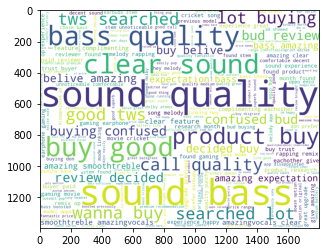

In [57]:
wordcloud_oppo_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(oppo_review_string_pre_processed)
plt.imshow(wordcloud_oppo_review)

In [58]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\positive-words.txt", "r") as ps:
    pos_words = ps.read()
pos_words = pos_words.split("\n")
oppo_review_words_pos = [w for w in oppo_review_words if w in pos_words]
oppo_review_words_pos

['good',
 'amazing',
 'amazing',
 'clear',
 'amazing',
 'clear',
 'happy',
 'perfect',
 'loved',
 'friendly',
 'perfect',
 'good',
 'clear',
 'trust',
 'great',
 'compatible',
 'incredible',
 'cheaper',
 'honest',
 'great',
 'prefer',
 'comfortable',
 'decent',
 'good',
 'good',
 'superb',
 'fantastic',
 'comfortable',
 'recommendation',
 'incredible',
 'crisp',
 'decent',
 'correctly',
 'impeccable',
 'gentle',
 'good',
 'clear',
 'good',
 'super',
 'trust',
 'great',
 'great',
 'comfort',
 'good',
 'great',
 'prefer',
 'comfortable',
 'decent',
 'worth',
 'happy',
 'super',
 'clear',
 'awesome',
 'good',
 'nice',
 'great',
 'nice',
 'sufficient',
 'excellent',
 'good',
 'balanced',
 'superb',
 'supreme',
 'awesome',
 'good',
 'good',
 'superb',
 'fantastic',
 'comfortable',
 'recommendation',
 'good',
 'amazing',
 'amazing',
 'clear',
 'amazing',
 'clear',
 'happy',
 'trust',
 'great',
 'great',
 'comfort',
 'good',
 'great',
 'prefer',
 'comfortable',
 'decent',
 'worth',
 'happy',


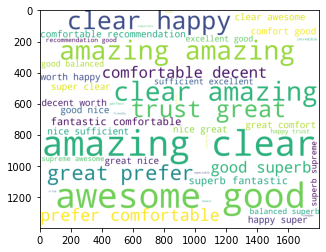

In [60]:
wordcloud_oppo_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(" ".join(oppo_review_words_pos))
plt.imshow(wordcloud_oppo_review)

In [63]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\negative-words.txt", "r") as ns:
    neg_words = ns.read()
neg_words = neg_words.split("\n")
oppo_review_words_neg = [w for w in oppo_review_words if w in neg_words]
oppo_review_words_neg

['confused',
 'regret',
 'disappointed',
 'disgrace',
 'loud',
 'noise',
 'hurt',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 'confused',
 'disappointed',
 'jumpy',
 'bomb',
 'disgrace',
 

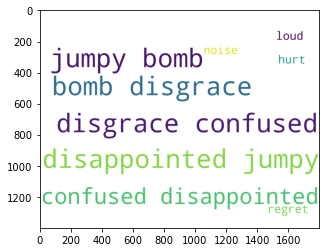

In [64]:
wordcloud_oppo_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(" ".join(oppo_review_words_neg))
plt.imshow(wordcloud_oppo_review)

# Task 2

In [19]:
for i in range(1,30):
    znmd=[]
url="https://m.imdb.com/title/tt0111161/reviews?ref_=tt_urv"+str(i)
response=requests.get(url)
soup=bs(response.content, "html.parser")
reviews = soup.find_all("div", attrs={"class", "text"})

for i in range(len(reviews)):
    znmd.append(reviews[i].text)
    
znmd_reviews = []
znmd_reviews = znmd_reviews + znmd
znmd_reviews 

['The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time th

In [21]:
znmd_reviews_string = " ".join(znmd_reviews)
znmd_reviews_string

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

In [23]:
znmd_reviews_string = re.sub("[^A-Za-z" "]+", " ", znmd_reviews_string).lower()
znmd_reviews_string

'the shawshank redemption is written and directed by frank darabont it is an adaptation of the stephen king novella rita hayworth and shawshank redemption starring tim robbins and morgan freeman the film portrays the story of andy dufresne robbins a banker who is sentenced to two life sentences at shawshank state prison for apparently murdering his wife and her lover andy finds it tough going but finds solace in the friendship he forms with fellow inmate ellis red redding freeman while things start to pick up when the warden finds andy a prison job more befitting his talents as a banker however the arrival of another inmate is going to vastly change things for all of them there was no fanfare or bunting put out for the release of the film back in with a title that didn t give much inkling to anyone about what it was about and with columbia pictures unsure how to market it shawshank redemption barely registered at the box office however come academy award time the film received several 

In [24]:
znmd_reviews_words = znmd_reviews_string.split(" ")
znmd_reviews_words

['the',
 'shawshank',
 'redemption',
 'is',
 'written',
 'and',
 'directed',
 'by',
 'frank',
 'darabont',
 'it',
 'is',
 'an',
 'adaptation',
 'of',
 'the',
 'stephen',
 'king',
 'novella',
 'rita',
 'hayworth',
 'and',
 'shawshank',
 'redemption',
 'starring',
 'tim',
 'robbins',
 'and',
 'morgan',
 'freeman',
 'the',
 'film',
 'portrays',
 'the',
 'story',
 'of',
 'andy',
 'dufresne',
 'robbins',
 'a',
 'banker',
 'who',
 'is',
 'sentenced',
 'to',
 'two',
 'life',
 'sentences',
 'at',
 'shawshank',
 'state',
 'prison',
 'for',
 'apparently',
 'murdering',
 'his',
 'wife',
 'and',
 'her',
 'lover',
 'andy',
 'finds',
 'it',
 'tough',
 'going',
 'but',
 'finds',
 'solace',
 'in',
 'the',
 'friendship',
 'he',
 'forms',
 'with',
 'fellow',
 'inmate',
 'ellis',
 'red',
 'redding',
 'freeman',
 'while',
 'things',
 'start',
 'to',
 'pick',
 'up',
 'when',
 'the',
 'warden',
 'finds',
 'andy',
 'a',
 'prison',
 'job',
 'more',
 'befitting',
 'his',
 'talents',
 'as',
 'a',
 'banker',
 'h

In [25]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\stopwords_en.txt", "r") as sw:
    stop_words = sw.read()
stop_words = stop_words.split("\n")
stop_words

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [26]:
znmd_reviews_words = [w for w in znmd_reviews_words if not w in stop_words]
znmd_reviews_words

['shawshank',
 'redemption',
 'written',
 'directed',
 'frank',
 'darabont',
 'adaptation',
 'stephen',
 'king',
 'novella',
 'rita',
 'hayworth',
 'shawshank',
 'redemption',
 'starring',
 'tim',
 'robbins',
 'morgan',
 'freeman',
 'film',
 'portrays',
 'story',
 'andy',
 'dufresne',
 'robbins',
 'banker',
 'sentenced',
 'life',
 'sentences',
 'shawshank',
 'state',
 'prison',
 'apparently',
 'murdering',
 'wife',
 'lover',
 'andy',
 'finds',
 'tough',
 'finds',
 'solace',
 'friendship',
 'forms',
 'fellow',
 'inmate',
 'ellis',
 'red',
 'redding',
 'freeman',
 'things',
 'start',
 'pick',
 'warden',
 'finds',
 'andy',
 'prison',
 'job',
 'befitting',
 'talents',
 'banker',
 'arrival',
 'inmate',
 'vastly',
 'change',
 'things',
 'fanfare',
 'bunting',
 'put',
 'release',
 'film',
 'back',
 'title',
 'didn',
 'give',
 'inkling',
 'columbia',
 'pictures',
 'unsure',
 'market',
 'shawshank',
 'redemption',
 'barely',
 'registered',
 'box',
 'office',
 'academy',
 'award',
 'time',
 'fil

In [27]:
WLN = nltk.WordNetLemmatizer()
znmd_reviews_words = [WLN.lemmatize(w) for w in znmd_reviews_words]
znmd_reviews_words

['shawshank',
 'redemption',
 'written',
 'directed',
 'frank',
 'darabont',
 'adaptation',
 'stephen',
 'king',
 'novella',
 'rita',
 'hayworth',
 'shawshank',
 'redemption',
 'starring',
 'tim',
 'robbins',
 'morgan',
 'freeman',
 'film',
 'portrays',
 'story',
 'andy',
 'dufresne',
 'robbins',
 'banker',
 'sentenced',
 'life',
 'sentence',
 'shawshank',
 'state',
 'prison',
 'apparently',
 'murdering',
 'wife',
 'lover',
 'andy',
 'find',
 'tough',
 'find',
 'solace',
 'friendship',
 'form',
 'fellow',
 'inmate',
 'elli',
 'red',
 'redding',
 'freeman',
 'thing',
 'start',
 'pick',
 'warden',
 'find',
 'andy',
 'prison',
 'job',
 'befitting',
 'talent',
 'banker',
 'arrival',
 'inmate',
 'vastly',
 'change',
 'thing',
 'fanfare',
 'bunting',
 'put',
 'release',
 'film',
 'back',
 'title',
 'didn',
 'give',
 'inkling',
 'columbia',
 'picture',
 'unsure',
 'market',
 'shawshank',
 'redemption',
 'barely',
 'registered',
 'box',
 'office',
 'academy',
 'award',
 'time',
 'film',
 'rece

In [28]:
znmd_review_string_pre_processed = " ".join(znmd_reviews_words)
znmd_review_string_pre_processed

'shawshank redemption written directed frank darabont adaptation stephen king novella rita hayworth shawshank redemption starring tim robbins morgan freeman film portrays story andy dufresne robbins banker sentenced life sentence shawshank state prison apparently murdering wife lover andy find tough find solace friendship form fellow inmate elli red redding freeman thing start pick warden find andy prison job befitting talent banker arrival inmate vastly change thing fanfare bunting put release film back title didn give inkling columbia picture unsure market shawshank redemption barely registered box office academy award time film received nomination won stirred interest film home entertainment release rest history film finally found audience film propelled mythical proportion endearing modern day classic delighted fan whilst simultaneously baffling detractor thing side shawshank fence sit film continues gather fan simply loose mythical status possibly simplicity sends hater film cinem

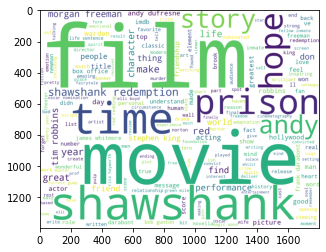

In [29]:
wordcloud_imdb_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(znmd_review_string_pre_processed)
plt.imshow(wordcloud_imdb_review)

In [31]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\positive-words.txt", "r") as ps:
    pos_words = ps.read()
pos_words = pos_words.split("\n")
wordcloud_imdb_review_pos = [w for w in znmd_reviews_words if w in pos_words]
wordcloud_imdb_review_pos

['redemption',
 'redemption',
 'lover',
 'tough',
 'solace',
 'talent',
 'fanfare',
 'redemption',
 'award',
 'won',
 'endearing',
 'modern',
 'classic',
 'delighted',
 'passion',
 'richly',
 'faith',
 'terrific',
 'easy',
 'easiest',
 'warm',
 'support',
 'great',
 'amusing',
 'impressively',
 'lush',
 'gracefully',
 'neatly',
 'excellently',
 'like',
 'gorgeous',
 'love',
 'love',
 'happiness',
 'inspiration',
 'warmth',
 'breathtaking',
 'love',
 'amazing',
 'gem',
 'entertaining',
 'redemption',
 'uncomplicated',
 'greatest',
 'uplift',
 'spiritual',
 'enlightenment',
 'faith',
 'affirmation',
 'classic',
 'wonderful',
 'popular',
 'enhanced',
 'top',
 'perfectly',
 'great',
 'phenomenal',
 'greatest',
 'inspiring',
 'intelligent',
 'positive',
 'smile',
 'lover',
 'finest',
 'great',
 'magnificent',
 'great',
 'steady',
 'great',
 'inspiring',
 'greatest',
 'redemption',
 'redemption',
 'award',
 'happy',
 'good',
 'redemption',
 'success',
 'master',
 'success',
 'easy',
 'fortun

In [35]:
znmd_reviews_pos_string = " ".join(wordcloud_imdb_review_pos)
znmd_reviews_pos_string

'redemption redemption lover tough solace talent fanfare redemption award won endearing modern classic delighted passion richly faith terrific easy easiest warm support great amusing impressively lush gracefully neatly excellently like gorgeous love love happiness inspiration warmth breathtaking love amazing gem entertaining redemption uncomplicated greatest uplift spiritual enlightenment faith affirmation classic wonderful popular enhanced top perfectly great phenomenal greatest inspiring intelligent positive smile lover finest great magnificent great steady great inspiring greatest redemption redemption award happy good redemption success master success easy fortunately fast wise tough love winner abundance strong amazing strong love hero love easy sweet exhilarating faith quiet carefree perfectly redemption strong hottest top top redemption finest poignant freedom freedom majestic strong wonderful shine fast great elegance excitement extraordinary won praise great fascinating greate

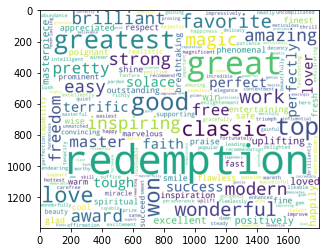

In [36]:
wordcloud_imdb_pos_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(znmd_reviews_pos_string)
plt.imshow(wordcloud_imdb_pos_review)

In [37]:
with open("D:\\360DigiTMG\\DataScience\\16. Text Mining-Sentiment Analysis\\Assignment Q\\negative-words.txt", "r") as ns:
    neg_words = ns.read()
neg_words = neg_words.split("\n")
wordcloud_imdb_review_neg = [w for w in znmd_reviews_words if w in neg_words]
wordcloud_imdb_review_neg

['prison',
 'prison',
 'unsure',
 'baffling',
 'loose',
 'hater',
 'implausible',
 'plot',
 'nonsense',
 'prison',
 'complaint',
 'dislike',
 'strike',
 'suffering',
 'degradation',
 'prison',
 'bad',
 'menacing',
 'antagonist',
 'vile',
 'prison',
 'anger',
 'sadness',
 'hardened',
 'adversity',
 'obstacle',
 'dire',
 'cry',
 'ironic',
 'corruption',
 'critic',
 'failed',
 'jaded',
 'prison',
 'lost',
 'regret',
 'crime',
 'pain',
 'prison',
 'prison',
 'horrifying',
 'pain',
 'stress',
 'pain',
 'overrated',
 'fiction',
 'failure',
 'fell',
 'failure',
 'nightmare',
 'prison',
 'worst',
 'slow',
 'weakness',
 'prison',
 'prison',
 'crack',
 'losing',
 'odd',
 'slowly',
 'prison',
 'lack',
 'prison',
 'fiction',
 'hell',
 'dying',
 'isolation',
 'bigotry',
 'hate',
 'misery',
 'misery',
 'prison',
 'crime',
 'loses',
 'fiction',
 'lost',
 'gimmick',
 'prison',
 'tingling',
 'critic',
 'prison',
 'bad',
 'prison',
 'prison',
 'bizarre',
 'cheating',
 'prison',
 'prison',
 'prison',
 'p

In [38]:
znmd_reviews_neg_string = " ".join(wordcloud_imdb_review_neg)
znmd_reviews_neg_string

'prison prison unsure baffling loose hater implausible plot nonsense prison complaint dislike strike suffering degradation prison bad menacing antagonist vile prison anger sadness hardened adversity obstacle dire cry ironic corruption critic failed jaded prison lost regret crime pain prison prison horrifying pain stress pain overrated fiction failure fell failure nightmare prison worst slow weakness prison prison crack losing odd slowly prison lack prison fiction hell dying isolation bigotry hate misery misery prison crime loses fiction lost gimmick prison tingling critic prison bad prison prison bizarre cheating prison prison prison prison prison break chill corruption hell sanctimonious corrupt monster prison bizarre puzzled underdog kill prisoner prison crime destructive loses prisoner prisoner desperation hopelessness bad insane vain sad harsh cold funny chill bad fallen wrong emergency doubt shake plot scary wrongly murder evil frightening suffers disappointed hardship daunting mu

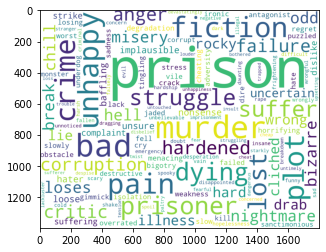

In [39]:
wordcloud_imdb_neg_review = WordCloud(background_color="white",
                                  width=1800,
                                  height=1400,
                                 ).generate(znmd_reviews_neg_string)
plt.imshow(wordcloud_imdb_neg_review)